# Load the IRIS Dataset

http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

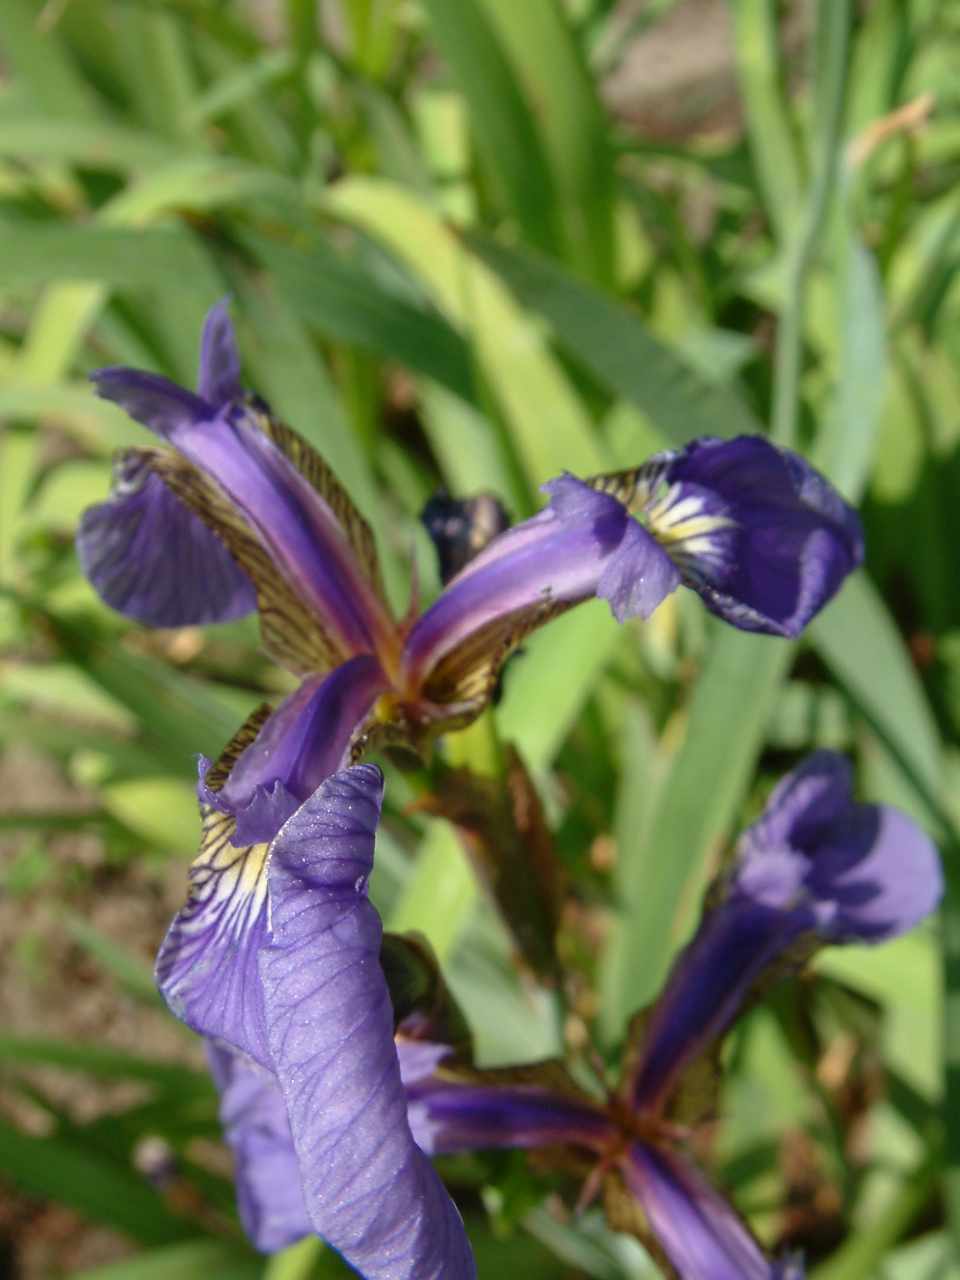

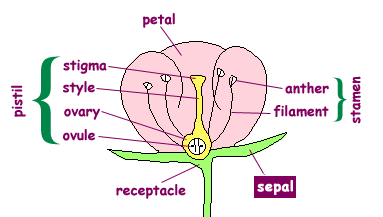

In [71]:
# The code was removed by DSX for sharing.

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [36]:
import pandas as pd

""" UCI website down - comment out
df = pd.read_csv(
    #filepath_or_buffer = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    filepath_or_buffer ='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv',
    header=None, 
    sep=',')
"""
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [37]:
# split data table into data X and class labels y

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [38]:
y

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolo

Our iris dataset is now stored in form of a 150×4 matrix where the columns are the different features, and every row represents a separate flower sample. Each sample row x can be pictured as a 4-dimensional vector
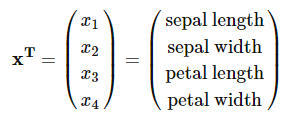


# Exploratory Visualization
To get a feeling for how the 3 different flower classes are distributed along the 4 different features, let us visualize them via histograms.

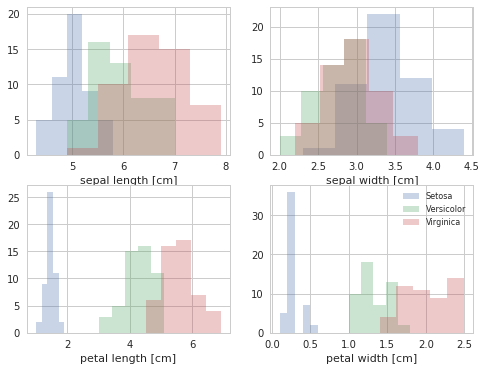

In [39]:
from matplotlib import pyplot as plt
import numpy as np
import math

label_dict = {1: 'Setosa',
              2: 'Versicolor',
              3: 'Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Setosa', 'Versicolor', 'Virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=5,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    #plt.tight_layout()
    plt.show()

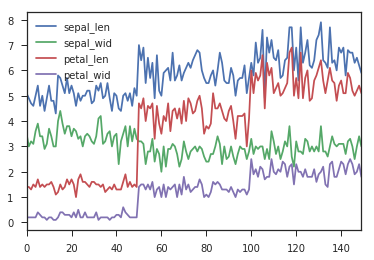

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff560a532d0>,
      dtype=object)

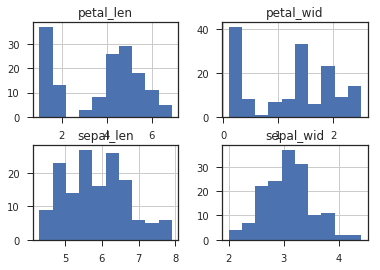

In [41]:
df.hist()

# Standardizing
Whether to standardize the data prior to a PCA on the covariance matrix depends on the measurement scales of the original features. Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [42]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(df.iloc[:,[0,1,2,3]])

# PCA the hard way
Calculate more or less from scratch

## Covariance Matrix
The classic approach to PCA is to perform the eigendecomposition on the covariance matrix Σ, which is a d×d matrix where each element represents the covariance between two features. The covariance between two features is calculated as follows:

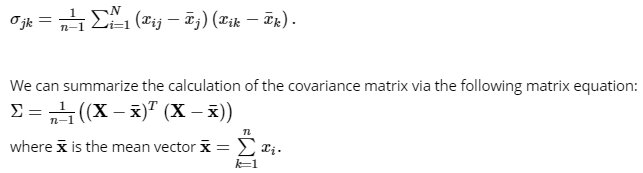


The mean vector is a d-dimensional vector where each value in this vector represents the sample mean of a feature column in the dataset.

In [43]:
X_std[:10,:]
#X_std.shape[0]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [44]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)


Covariance matrix 
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [45]:
# same thing but easier
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


Next, we perform an eigendecomposition on the covariance matrix:

In [46]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]


## Correlation Matrix

Especially, in the field of "Finance," the correlation matrix typically used instead of the covariance matrix. However, the eigendecomposition of the covariance matrix (if the input data was standardized) yields the same results as a eigendecomposition on the correlation matrix, since the correlation matrix can be understood as the normalized covariance matrix. Eigendecomposition of the standardized data based on the correlation matrix:

In [47]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.91849782 0.91403047 0.14675688 0.02071484]


Eigendecomposition of the **raw data** based on the correlation matrix:

In [48]:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)
#eig_vals, eig_vecs = np.linalg.eig(X.T.dot(X))

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.91849782 0.91403047 0.14675688 0.02071484]


We can clearly see that all three approaches yield the same eigenvectors and eigenvalue pairs:

- Eigendecomposition of the covariance matrix after standardizing the data.<br>
- Eigendecomposition of the correlation matrix.<br>
- Eigendecomposition of the correlation matrix after standardizing the data.<br>

# Explained Variance
After sorting the eigenpairs, the next question is “how many principal components are we going to choose for our new feature subspace?” A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [49]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

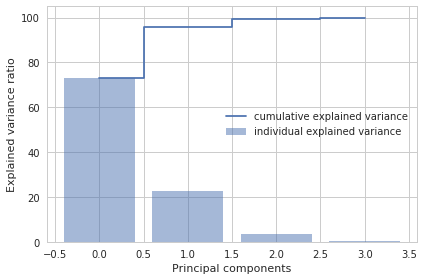

In [50]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

The plot above clearly shows that most of the variance (72.77% of the variance to be precise) can be explained by the first principal component alone. The second principal component still bears some information (23.03%) while the third and fourth principal components can safely be dropped without losing to much information. Together, the first two principal components contain 95.8% of the information.

# Singular Vector Decomposition

While the eigendecomposition of the covariance or correlation matrix may be more intuitiuve, most PCA implementations perform a Singular Vector Decomposition (SVD) to improve the computational efficiency. So, let us perform an SVD to confirm that the result are indeed the same:

Break stnadardized matrix down into eigens two different ways and then reconstruct

first way: use X_std directly

In [51]:
u,s,v = np.linalg.svd(X_std)
u.shape,s.shape,v.shape


((150, 150), (4,), (4, 4))

In [52]:
# if allclose returns True then the reconstruction and original are the same
np.allclose(X_std, np.dot(u[:, :4] * s, v))

True

second way: use X_std transposed

In [53]:
ut,st,vt = np.linalg.svd(X_std.T)
ut.shape,st.shape,vt.shape

((4, 4), (4,), (150, 150))

In [54]:
# if allclose returns True then the reconstruction and original are the same
np.allclose(X_std.T, np.dot(ut[:, :4] * st, vt[:4,:]) )

True

In [55]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9184978165319952
0.9140304714680695
0.1467568755713151
0.020714836428619064


# Plot Raw Data in Color in Scatter_Matrix
    

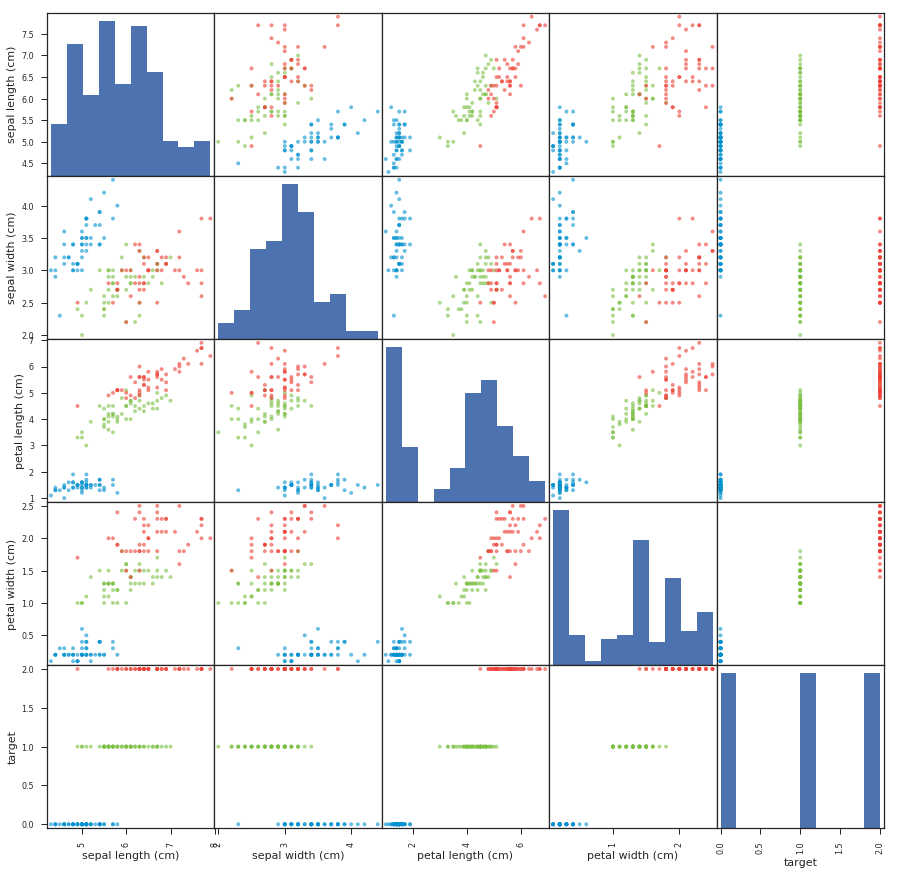

In [56]:
from pandas.tools.plotting import scatter_matrix
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']

color_wheel = {1: "#0392cf", 
               2: "#7bc043", 
               3: "#ee4035"}
colors = iris_data["target"].map(lambda x: color_wheel.get(x + 1))
ax = scatter_matrix(iris_data, c=colors, alpha=0.6, figsize=(15, 15), diagonal='hist')

# Projection Matrix

It’s about time to get to the really interesting part: The construction of the projection matrix that will be used to transform the Iris data onto the new feature subspace. Although, the name “projection matrix” has a nice ring to it, it is basically just a matrix of our concatenated top k eigenvectors.

Here, we are reducing the 4-dimensional feature space to a 2-dimensional feature subspace, by choosing the “top 2” eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix W.

In [57]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [58]:
eig_pairs[0][1]

array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])

In [59]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

('Matrix W:\n', array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]]))


# 3 - Projection Onto the New Feature Space

In this last step we will use the 4×2-dimensional projection matrix W to transform our samples onto the new subspace via the equation
Y=X×W, where Y is a 150×2 matrix of our transformed samples.

In [60]:
Y = X_std.dot(matrix_w)
Y.shape

(150, 2)

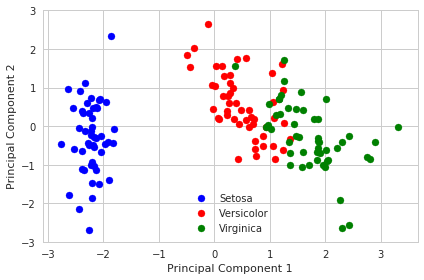

In [61]:
import matplotlib.pyplot as plt
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Setosa', 'Versicolor', 'Virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

# Shortcut - PCA in scikit-learn
For educational purposes, we went a long way to apply the PCA to the Iris dataset. But luckily, there is already implementation in scikit-learn.

Notice the dimesions - 150 data points plotted

In [62]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X_std)
Y_sklearn.shape


(150, 4)

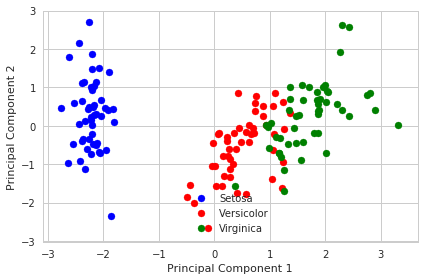

In [63]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Setosa', 'Versicolor', 'Virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [64]:
sklearn_pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

# Experiment w PCA of transpose 

Notice the dimensions - instead of 150 points corresponding to the number of rows of X_std

We have only 4 dimensions wi th this transpose data - these correspond to the columns (sepal length, pdeal length, etc)

In [65]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X_std.T)    #experiment on PCA of transpose
sklearn_pca.explained_variance_ratio_


array([0.9055306 , 0.08219104, 0.01227836])

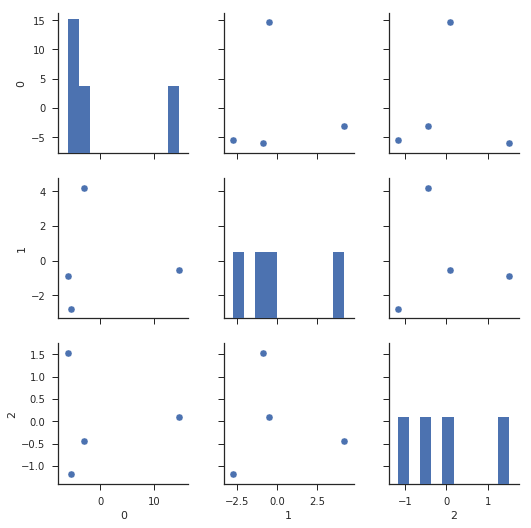

In [66]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(pd.DataFrame(Y_sklearn))